# Workshop on Network Science

##### Authors: Mauricio Barahona and Robert Peach

##### Motiviation

We are surrounded by systems that are hopelessly complicated - complex systems - and behind each complex system there is an intricate network that encodes the interactions between the individual components.
Knowing the systems components, such as the neurons in the brain, is insufficient to derive the collective behaviour of millions interacting. Given the important role complex systems play in our daily life, in science and in economy, their understanding, mathematical description, prediction, and eventually control is one of the major intellectual and scientific challenges of the 21st century. We will never understand complex systems unless we develop a deep understanding of the networks behind them.

![title](images/network.gif)


Network science is a relatively new discipline when compared to traditional subjects: Its exact beginning is up for debate, but has only really emerged as a separate discipline during the 21st century. The development of tools to interrogate networks, and the areas that have benefitted from network analyses, have grown exponentially over recent years. 

Note: There is no real difference between a **graph** and  **network**. However, when we model a real, existing system as a graph, we tend to call it a network.



##### What to expect from this workshop?

We want to give a first introduction to networks, show you a diverse set of applications, and introduce standard methods for working with networks in Python. We will certainly not be comprehensive, but instead zone in on a few interesting use-cases, with a slight tendency towards neuroscience. We will lightly touch on the following:
1. Introduction to the NetworkX package in Python.
2. The structure of the Caenorhabditis elegans connectome.
3. Dynamics on networks (e.g., synchronisation, epidemics).
4. Network Neuroscience.

##### What might we learn?

We don't necessarily want you to learn every detail about the examples we give, instead we want to give you a flavour for networks such that you might see links with your own research now or in the future.

1. Familiarity with NetworkX Python package.
2. Understanding the importance of approaches to visualisation of networks.
3. How to apply algorithmic tools to examine network structure, including:
    - Community detection
    - Centrality
    - Clustering
4. Perform dynamics on networks:
    - Synchronisation models
    - Epidemic simulations
5. Aspects of network construction with neuroscientific data:
    - Functional connectivity data
    - Pose estimation data


### Fill out the following form (just once!)

Before we get started, please complete the following google form (if you consent to taking part). 

https://docs.google.com/forms/d/e/1FAIpQLSepRdz-GrlIDgqlR-ArVlZShMVcdu72NFleX2JcB8qu-s9b8g/viewform?usp=sf_link

Together, we will analyse the resulting social network later!


### Getting started

Before you run these notebooks, there are a few dependencies (packages that you need to also have installed). These should all be defined in the requirements.txt file. 

Just access the main folder for this code via the terminal and run:
> pip install -r requirements.txt

If there are any further problems, please let us know and we will do our best to fix it.

# Introduction to Networks

Let us begin our foray into network science with a short introduction to NetworkX. Installation details for the package can be found here: https://networkx.org/documentation/stable/install.html.

Note: we have chosen NetworkX because its comprehensive library of functions and wider familiarity in the scientific community, but emphasise that there are many other network packages (of which some are considerably faster) including:

- igraph: https://igraph.org/ Collection of network analysis tools with emphasis on efficiency, portability and ease of use.
- graph-tool: https://graph-tool.skewed.de/ Graph-tool is an efficient Python module for manipulation and statistical analysis of graph (backend in C++)
- NetworKit: https://networkit.github.io/ A growing open-source toolkit for large-scale network analysis. 
- snap.py: https://snap.stanford.edu/snappy/ Python interface for SNAP. SNAP is a general purpose, high performance system for analysis and manipulation of large networks. 
- pathpy: https://www.pathpy.net/ Open Source python package providing higher-order network analytics for time series data.
- hypernextx: https://pnnl.github.io/HyperNetX Extending networks to hypergraphs.
- brainconn: https://brainconn.readthedocs.io/en/latest/ Python package for graph theoretic analysis of neuroimaging data.
- and many, many more.





### Lets get started...

Lets first make some Python package imports to help us through our journey through the wonders of Network Science and Graph theory

In [1]:
import numpy as np
import pickle
import networkx as nx
import matplotlib.pyplot as plt
import scipy as sc
from scipy import sparse
import scipy.sparse.linalg
from scipy.sparse.linalg import eigs
import pandas as pd

In [2]:
# we can first generate a classical graph from NetworkX to play with
G = nx.karate_club_graph()

Notice below how the edges can be weighted.

In [3]:
# we can look at the edge information
G.edges(data=True)

EdgeDataView([(0, 1, {'weight': 4}), (0, 2, {'weight': 5}), (0, 3, {'weight': 3}), (0, 4, {'weight': 3}), (0, 5, {'weight': 3}), (0, 6, {'weight': 3}), (0, 7, {'weight': 2}), (0, 8, {'weight': 2}), (0, 10, {'weight': 2}), (0, 11, {'weight': 3}), (0, 12, {'weight': 1}), (0, 13, {'weight': 3}), (0, 17, {'weight': 2}), (0, 19, {'weight': 2}), (0, 21, {'weight': 2}), (0, 31, {'weight': 2}), (1, 2, {'weight': 6}), (1, 3, {'weight': 3}), (1, 7, {'weight': 4}), (1, 13, {'weight': 5}), (1, 17, {'weight': 1}), (1, 19, {'weight': 2}), (1, 21, {'weight': 2}), (1, 30, {'weight': 2}), (2, 3, {'weight': 3}), (2, 7, {'weight': 4}), (2, 8, {'weight': 5}), (2, 9, {'weight': 1}), (2, 13, {'weight': 3}), (2, 27, {'weight': 2}), (2, 28, {'weight': 2}), (2, 32, {'weight': 2}), (3, 7, {'weight': 3}), (3, 12, {'weight': 3}), (3, 13, {'weight': 3}), (4, 6, {'weight': 2}), (4, 10, {'weight': 3}), (5, 6, {'weight': 5}), (5, 10, {'weight': 3}), (5, 16, {'weight': 3}), (6, 16, {'weight': 3}), (8, 30, {'weight': 3

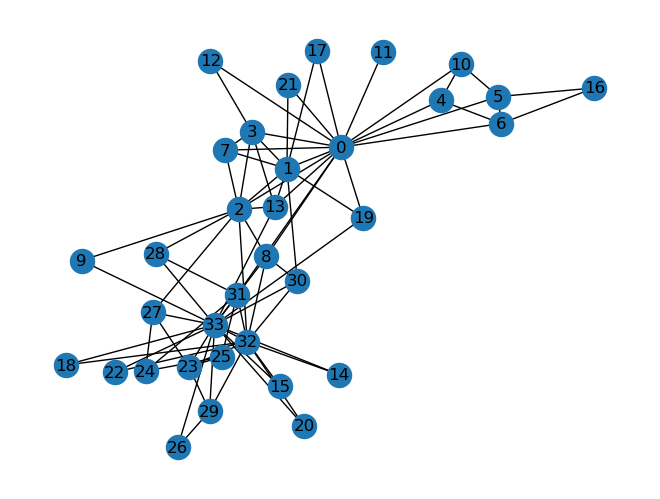

In [4]:
# its easy to draw wth networkX! It default uses a spring layout
nx.draw(G, with_labels=True)

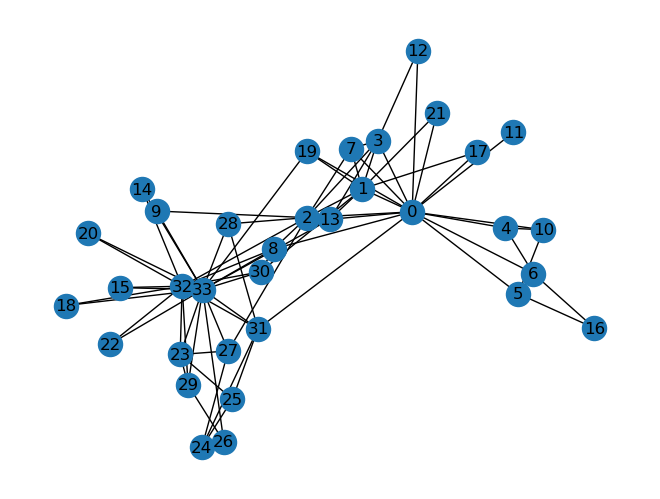

In [5]:
# we can also define a dictionary for plotting positions
pos = nx.spring_layout(G) # defining the layout with springs
nx.draw(G, with_labels=True)

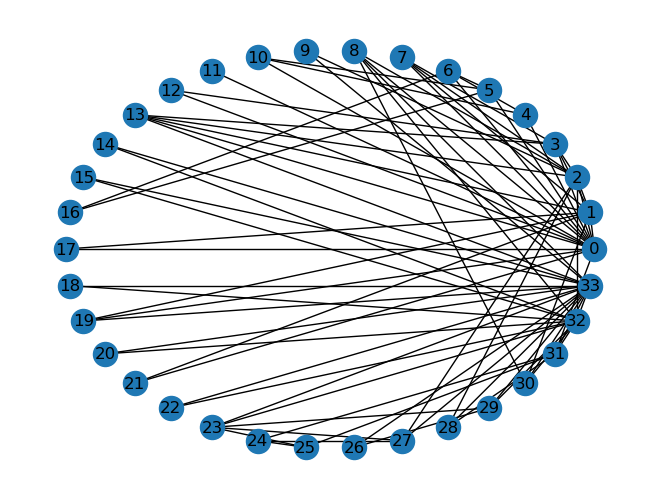

In [6]:
# but we can also use other layouts... 
nx.draw(G, pos=nx.circular_layout(G), with_labels=True)

/tmp/ipykernel_37530/112689464.py:2: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  A = nx.adjacency_matrix(G) # extract adjacency matrix


matrix([[0, 4, 5, ..., 2, 0, 0],
        [4, 0, 6, ..., 0, 0, 0],
        [5, 6, 0, ..., 0, 2, 0],
        ...,
        [2, 0, 0, ..., 0, 4, 4],
        [0, 0, 2, ..., 4, 0, 5],
        [0, 0, 0, ..., 4, 5, 0]])

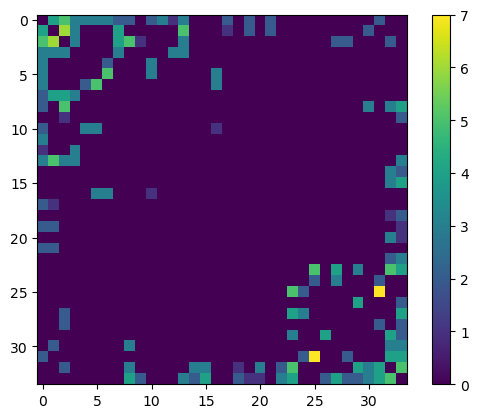

In [12]:
# the network has an associated adjacency matrix A
A = nx.adjacency_matrix(G) # extract adjacency matrix
plt.imshow(A.todense()); plt.colorbar(); # plot matrix 
A.todense()

/tmp/ipykernel_37530/770901233.py:2: FutureWarning: incidence_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  B = nx.incidence_matrix(G, weight='weight') # extract adjacency matrix


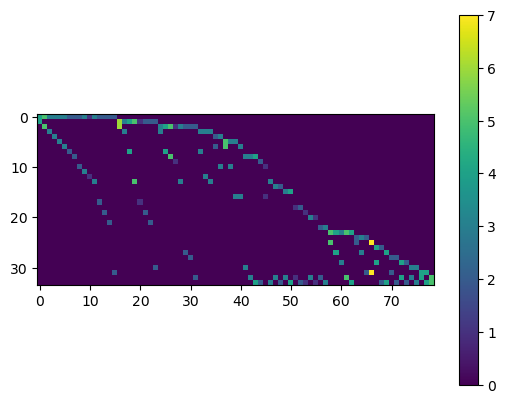

In [13]:
# we can also get the incidence matrix B
B = nx.incidence_matrix(G, weight='weight') # extract adjacency matrix
plt.imshow(B.todense()); plt.colorbar();  # plot matrix 


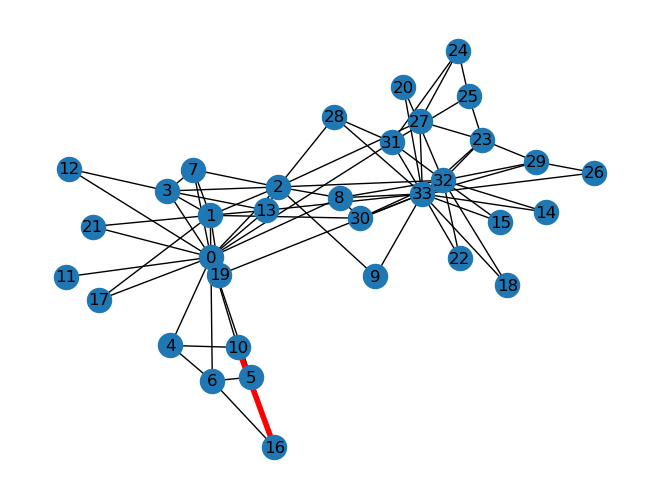

In [14]:
# we can add edges
G.add_edge(10, 16, weight=1)  # specify edge data

# lets visualise the added edges
nx.draw(G, pos, with_labels=True) 
nx.draw_networkx_edges(G, pos, edgelist=[(10,16)], edge_color='r', width=4) # draw additional edge

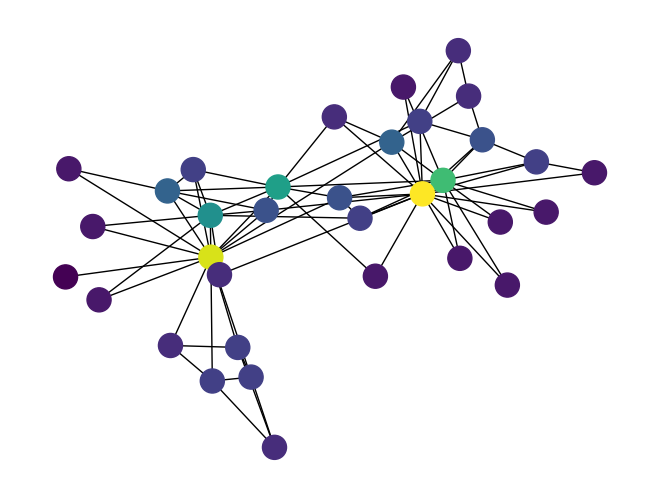

In [15]:
# we can identify nodes that are central according to their degree
centrality = nx.degree_centrality(G)
nx.draw(G, pos, node_color=list(centrality.values())) 

# Caenorhabditis elegans connectome 

Now that we have had a brief introduction to NetworkX, lets jump into a particular example and continue our introduction of networks.

Here, we will go through an analysis of the Caenorhabditis elegans connectome.
C. elegans is the only organism for which the wiring diagram of its complete nervous system has been mapped with reasonable accuracy at the cellular level. Despite this structural information, which has been available for decades, it still proves difficult to understand the system, e.g, resolving the functional involvement of specific neurons in defined behavioural responses.

We will use data that we have reconstructed (with some difficulty) from the following article with the inclusion of muscles https://www.nature.com/articles/nature24056.
The connectome is composed of directed connections from one neuron to another neuron in accordance with their biological influence.
Each node falls into one of four categories:
1. Sensory neurons
2. Inter neurons
3. Motor neurons
4. Muscles

Therefore, we can model the nematode nervous system as a *directed network* whose nodes include neurons and muscles, and whose links represent the electrical and chemical synaptic connections between them, including neuromuscular junctions. The weights of the edges correspond to the number of synaptic connections between a pair of neurons.





In [16]:
# load our data from a pickle object
with open('celegan_data.pickle', 'rb') as handle:
    [G, _, groups, neuron_class, colours] = pickle.load(handle)
    

In [17]:
# lets see what data we have!
G.nodes(data=True)

NodeDataView({0: {'type': 'I', 'name': 'ADAR', 'neuron_class': 'ADA'}, 1: {'type': 'I', 'name': 'ADAL', 'neuron_class': 'ADA'}, 2: {'type': 'S', 'name': 'ADFL', 'neuron_class': 'ADF'}, 3: {'type': 'S', 'name': 'ASHL', 'neuron_class': 'ASH'}, 4: {'type': 'I', 'name': 'AVDR', 'neuron_class': 'AVD'}, 5: {'type': 'I', 'name': 'PVQL', 'neuron_class': 'PVQ'}, 6: {'type': 'I', 'name': 'AIBL', 'neuron_class': 'AIB'}, 7: {'type': 'I', 'name': 'AIBR', 'neuron_class': 'AIB'}, 8: {'type': 'I', 'name': 'AVAR', 'neuron_class': 'AVA'}, 9: {'type': 'I', 'name': 'AVBL', 'neuron_class': 'AVB'}, 10: {'type': 'I', 'name': 'AVBR', 'neuron_class': 'AVB'}, 11: {'type': 'I', 'name': 'AVDL', 'neuron_class': 'AVD'}, 12: {'type': 'I', 'name': 'AVEL', 'neuron_class': 'AVE'}, 13: {'type': 'I', 'name': 'AVJR', 'neuron_class': 'AVJ'}, 14: {'type': 'S', 'name': 'FLPR', 'neuron_class': 'FLP'}, 15: {'type': 'I', 'name': 'RICL', 'neuron_class': 'RIC'}, 16: {'type': 'I', 'name': 'RICR', 'neuron_class': 'RIC'}, 17: {'type

## 1. Visualisation of C. Elegan Structure 

Lets plot a basic visualisation with the commands we saw earlier, i.e., the spring layout.

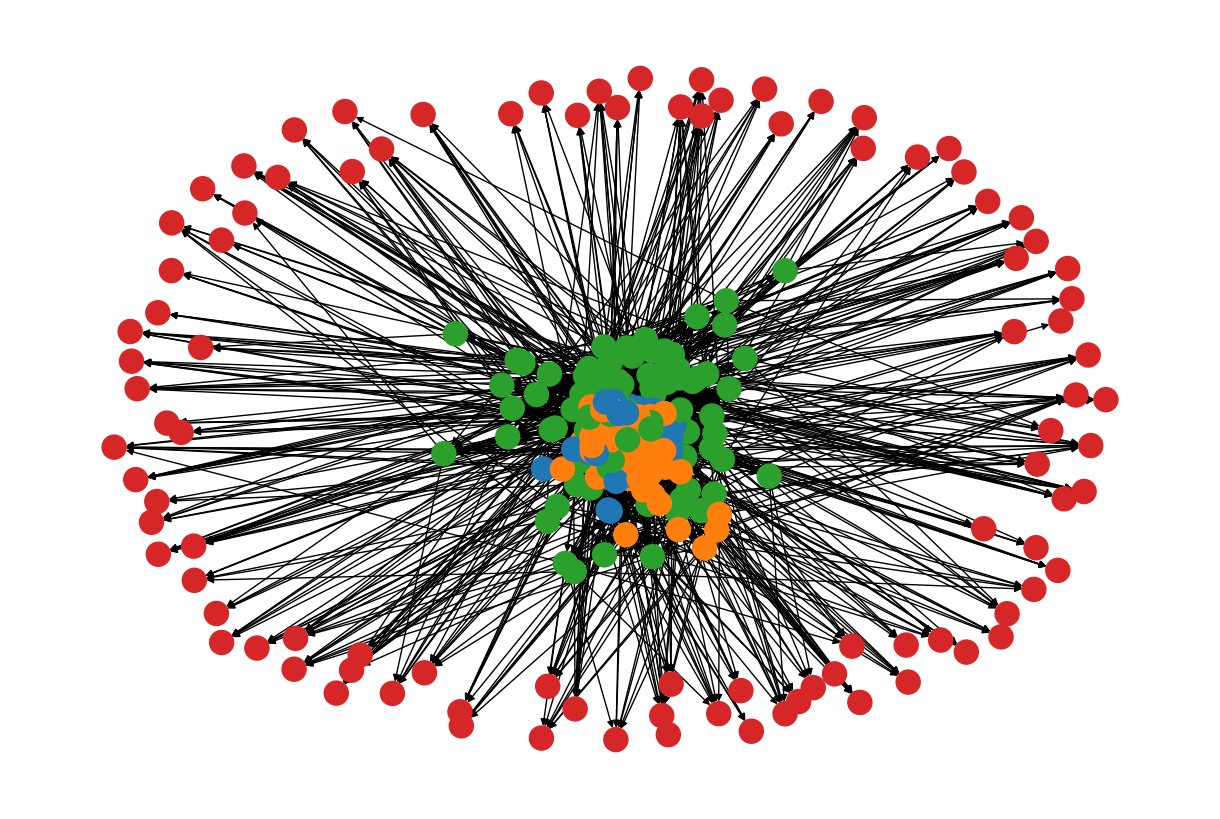

In [18]:
# lets plot the network using the spring layout we saw earlier!

plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G)
nx.draw(G,pos=pos,node_color=colours)

What information does this provide us? 
1. We can see that the muscles (in red) are located at the periphery.
2. The interneurons (blue) seem to be more central to the structure, followed by the sensory neurons (orange) and then motor neurons (green).

But its still not particularly informative. I don't personally get a sense of network structure. **Can we do better?** 

We could provide the exact layout defined in the physical structure of the C. Elegan, but 3-dimensional network structures often don't translate well to 2-dimensional visualisations. Moreover, the physical layout might hide aspects of the network dynamics. 

Instead, we are going to implement a special layout of the C.Elegan network based on flow paths (https://journals.plos.org/ploscompbiol/article?id=10.1371/journal.pcbi.1001066). This part might be quite involved,  but **don't feel like you need to follow everything here**.

Our aim: 
1. Arrange the nodes (neurons) along the vertical axis conveys information about the directionality of the signal flow in the network
2. Arrange the nodes (neurons) along the horizontal axis to convey information about the strength of connectivity regardless of directionality.





#### 1. Vertical coordinate

We want to arrange the neurons so that for every synaptically connected pair of neurons, the difference in $z$ between a presynaptic neuron *i* and a postsynaptic neuron *j* is as close to one as possible.

We can define an energy function of the connectivity matrix which we need to minimise:

<center>$E = \frac{1}{2} \sum_{i,j=1}^{n} W_{ij}(z_i - z_j - sgn(A_{ij}- A_{ji}))^2$</center>

which is the sum of the gap junction and chemical connectivity matrices, and
the symmetrized connectivity matrix $W_{ij}$ , which satisfies $W_{ij}$  = ($A_{ij}$  +$A_{ji}$ )/2. Lets get some intuition for this formula:
1. If two neurons aren't connected then $W_{ij}=0$ and thus they contribute nothing to the sum.
2. If two neurons are connected we want to find coordinates $z_i$ and $z_j$ such that  $z_i- z_j \rightarrow 0$, i.e., we want to place them as close together as possible. 
3. The weight $W_{ij}$ indicates how ‘important’ it is that $z_i - z_j - sgn(A_{ij}- A_{ji})$ is small.
4. The term $sgn(A_{ij}- A_{ji})$ imposes a height difference. Reversing the direction of the edge turns this value from positive to negative.

Since the above equation is a nice quadratic function, we can find the minimum by setting the derivative of the above expression to zero (how is everyones A-level maths doing?). In doing so we find,

<center>$Lz = b$</center>

where $z$ is our $N \times 1$ vector of coordinates, $b_i = \sum_{j=1}^{n} W_{ij} sgn(A_{ij}$ -$A_{ji})$ and $L = D-W$ is the graph Laplacian which is defined in terms of a diagonal matrix $D$ that contains the number of synaptic terminals on corresponding neurons,

<center>$D_{ij} = \delta_{ij} \sum_{k=1}^{n} W_{ik}$</center>

where a unique solution to this equation can be found by using the pseudoinverse.

<center>$z = L^{\dagger}b$</center>

We skipped a lot of steps here transitioning from the energy function to the Laplacian formulation for brevity - you can find the details here [1]. 

Lets just recap a little on what we did: **We have used principles of the weighted network structure to bring nodes closer together that are linked with heavier weighted edges, and imposed nodes with out-going edges to be vertically higher in the network visualisation.**

Note 1: The Laplace operator is a differential operator given by the divergence of the gradient. The Laplacian describes how a function differs from its average locally, which also holds for graph Laplacians $L$ above.

Note 2: The sgn() function simply indicates that we take the sign of the values in the matrix (positive or negative).

[1] 1. Carmel L, Harel D, Koren Y (2004) Combining hierarchy and energy for drawing directed graphs. IEEE
Trans Vis Comput Graphics 10:46–57. doi:10.1109/TVCG.2004.1260757

In [19]:
# let us reverse the direction of the edges (to point from muscles towards sensory neurons)
G_ = G.reverse()

# first we will extract the adjacency matrix of our graph
A = np.array(nx.to_numpy_matrix(G_))
    
# define a matrix W as the undirected adjacency matrix of our graph   
W = 0.5 * (A + A.T)                                                                                 
     
# extract the weighted degree associated with each neuron
weighted_degree = np.array(W.sum(1)).flatten()

# create diagonal matrix of weighted degree
D = np.diag(weighted_degree)        

# defining the minimum to target
b = np.array((W * np.sign(A - A.T)).sum(0)).flatten()                                               

# defining the graph Laplacian
L = (nx.laplacian_matrix(nx.Graph(W))).toarray()

# taking pseudo inverse of Laplacian and dot product with b
z = np.array(np.linalg.pinv(L).dot(b)).flatten()


<class 'networkx.utils.decorators.argmap'> compilation 16:4: FutureWarning: laplacian_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.


#### 2. Horizontal coordinate

To find the horizontal coordinates, we use the Laplacian, $L$, normalized by the number-of-terminals matrix $D$,

<center>$L_{norm} = D^{-1/2}LD^{-1/2}$.</center>

We are interested in taking the eigenvector with the second lowest eigenvalue of $L_{norm}$, we denote this as $v_2$. Then the horizontal coordinates for our visualisation are found by weighting the eigenvector value for each node by its weighted degree (i.e. the weight of all incoming and outgoing connections),

<center>$x = D^{-1/2}v_2$ </center>

This method produces an aesthetically appealing drawing because each neuron is placed in the weighted centroid of its neighbors. Thus strongly coupled neurons tend to be co-located and nodes that are play a more fundamental role within the structure of the network are placed more centrally along the x-dimension.

In [20]:
# define normalized graph Laplacian
L_norm = nx.normalized_laplacian_matrix(nx.Graph(W))

# perform eigendecomposition with scipy package
V, U = sc.sparse.linalg.eigs(L_norm, which="SM", k=3)

# take second and third eigenvectors
vs = U[:, 1:]

# normalisation matrix - square root of the degree
D_sqrt_inv = np.diag(1 / np.sqrt(np.diag(D)))

# dot product each eigenvector with the normalisation matrix
v2 = D_sqrt_inv.dot(vs[:, 0])
v3 = D_sqrt_inv.dot(vs[:, 1])


<class 'networkx.utils.decorators.argmap'> compilation 20:4: FutureWarning: normalized_laplacian_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.


#### Define coordinates and replot

Now that we have our vertical and horizontal coordinates (finally..) we can bring them together and plot our network!

In [24]:
# loop over each node and assigned x,y coordinates in dictionary
pos = {}
for i in G:
    pos[i] = (np.real(v2[i]), z[i])


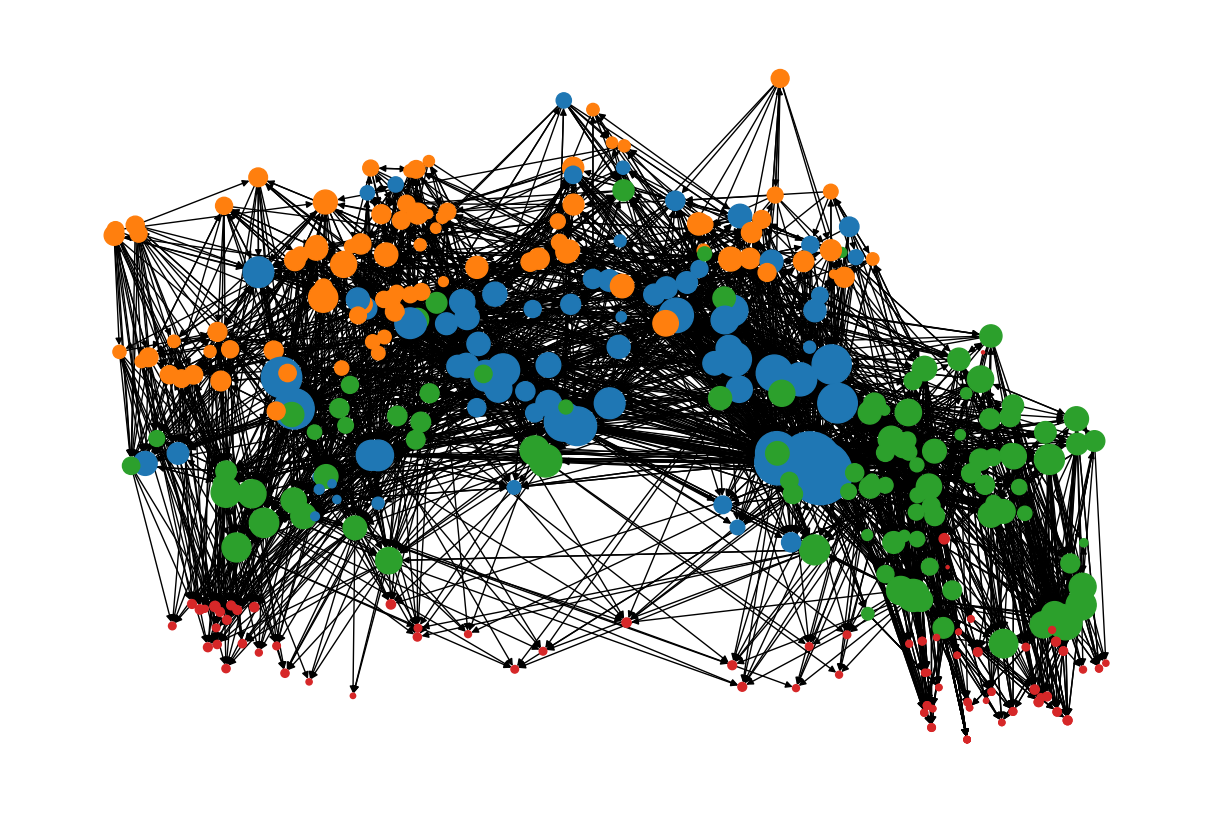

In [25]:
plt.figure(figsize=(12, 8))

# plot 
nx.draw(G, pos = pos, node_color=colours,node_size=weighted_degree*10)

#### Visualisation Summary

The plot above seems a little easier to undertand in comparison to our first attempts! The distance along the vertical coordinate corresponds roughly to the number of synapses from sensory to motor neurons—the signal flow depth of the network. Neuronal position on the horizontal plane represents the connectivity closeness of neurons in the combined chemical and electrical synapse network. 

Thus, the visualisation represents not the physical placement of neurons in the worm but signal flow and closeness in the network. Such visualization reveals that motorneurons and some interneurons segregate into two lobes along the first horizontal axis: the right lobe contains motorneurons in the ventral cord and the left lobe consists of neck neurons. The bi-lobe structure suggests partial autonomy of motorneurons in the ventral cord and neck. Interneurons that could coordinate the function of the two lobes can be easily identified by their central location.

Of course, defining this layout was a little involved and requires some thinking, but it **highlights the importance of visualisation in network analysis.** You should also start to think carefully about how you visualise your networks in the future!

## 2. Small world properties of C.Elegan

Now that the network visualiation is out of the way, lets look at some network measures! We can now investigate properties that may describe the efficiency of signal transmission across the gap junction network. 

#### Characteristic path length

The geodesic distance, $d_{ij}$, between two neurons in the network is the length of the shortest network path between them (respecting the directionality in our directed network). The network path is measured by the number of connections that are crossed rather than by physical distance. The average geodesic distance over all pairs of neurons is the characteristic path length.

<center>$L = \frac{1}{N(N-1)}\sum_{i,j:i\neq j}d_{ij}$</center>

This global measure describes how readily or rapidly a signal can travel from one neuron to another since it is simply the average distance between all neurons.

Watts DJ, Strogatz SH (1998) Collective dynamics of ‘small-world’ networks. Nature 393: 440–442. 


In [26]:
nx.average_shortest_path_length(G)

2.1487739150064904

In [27]:
nx.average_shortest_path_length(G, weight='weight')

2.5472585924713584

How does this compare with a random graph with the same degree sequence?

In [28]:
# extract in and out degree sequence of C.Elegan graph
din = list(d for n, d in G.in_degree()) 
dout = list(d for n, d in G.out_degree())

# use configuration model to generate a random graph with the same in and out degree sequence
G_random = nx.directed_configuration_model(din, dout)

nx.average_shortest_path_length(G_random)

1.955090580732547

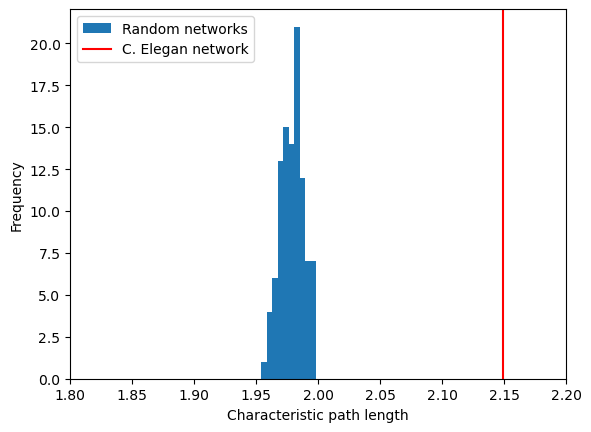

In [32]:
# we can look at the distribution of across many repeated instantiations of the graph
n_repeats = 100
spl = []
for i in range(100):
    G_random = nx.directed_configuration_model(din, dout)
    spl.append(nx.average_shortest_path_length(G_random))

# plot distribution
plt.hist(spl,label='Random networks'); plt.xlim([1.8, 2.2])
plt.xlabel('Characteristic path length');plt.ylabel('Frequency')

# plot real c.elegan average shortest path length
plt.axvline(x=nx.average_shortest_path_length(G),color='r',label='C. Elegan network')
plt.legend()

What is this telling us? We see that the average path length of random graphs are shorter than the C.Elegan. Suggesting that the C.Elegan network topology has evolved to have longer routes in its nervous system. Why could this be?



#### Clustering coefficient

The clustering coefficient $C_i$ measures the density of connections among an average nodes neighbors.
There are several definitions of clustering for directed graphs in the literature, but here we use the clustering of the out-connected neighbors since it captures signal flow emanating from a given neuron.

<center>$C = \frac{1}{N} \sum_i C_i$    and   $C_i = \frac{E(N_i)}{k_i(k_i-1)}$</center>

where $E(N_i)$ is the number of connections between out-neighbors of neuron $i$, $k_i$ is the number of out-neighbors of $i$, and $C_i$ measures the density of connections in the neighborhood of neuron $i$. 

In [45]:
# individual node clustering coefficient unweighted
clustering = nx.clustering(G)

# average across all nodes
global_clustering = np.mean(list(clustering.values()))
print(global_clustering)

0.20642801634582147


How does this compare to a random graph with the same degree sequence?

In [46]:
# extract in and out degree sequence of C.Elegan graph
din = list(d for n, d in G.in_degree()) 
dout = list(d for n, d in G.out_degree())

# use configuration model to generate a random graph with the same in and out degree sequence
G_random = nx.directed_configuration_model(din, dout)

In [47]:
# individual node clustering coefficient unweighted
clustering = nx.clustering(nx.Graph(G_random))

# average across all nodes
global_clustering_rand = np.mean(list(clustering.values()))
print(global_clustering_rand)

0.1156879164691782


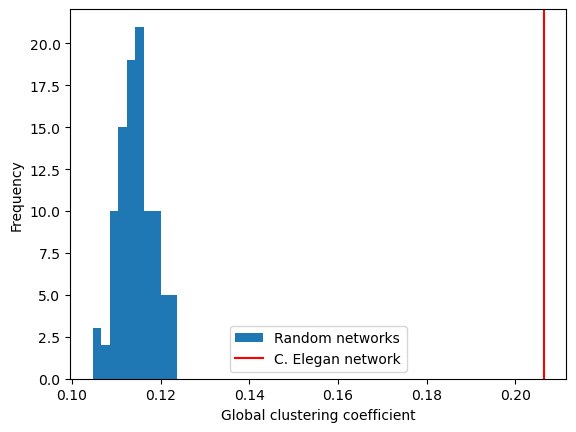

In [50]:
# we can look at the distribution of across many repeated instantiations of the graph
n_repeats = 100
c_dist = []
for i in range(100):
    G_random = nx.directed_configuration_model(din, dout)
    c = nx.clustering(nx.Graph(G_random))
    clustering = np.mean(list(c.values()))
    c_dist.append(clustering)

# plot distribution
plt.hist(c_dist,label='Random networks'); #plt.xlim([0.05, 0.25])
plt.xlabel('Global clustering coefficient');plt.ylabel('Frequency')

# plot real c.elegan average shortest path length
plt.axvline(x=global_clustering,color='r',label='C. Elegan network')
plt.legend()

The average clustering is much lower in the random graph than the C.Elegans. This suggests that something about the structure of the C.Elegan graph that deviates from chance. Higher than chance clustering may play a key role in mediating its control over the C.Elegan.

## 3. Important neurons in the C.Elegan


There is no absolute definition of importance in a network. However, centrality measures attempt to capture aspects of node 'importance'. Centrality measures are among the most widely used indices based on network data. They generally reflect a unit's prominence; in different substantive settings, this may be its structural power, status, prestige, or visibility. Studies often use network-based centrality measures in efforts to account for interunit differences in behavior or attitudes.

There are four well-known centrality measures: degree, betweenness, closeness and eigenvector - each with its own strengths and weaknesses. The main point we want to make is that the analytical usefulness of each depends heavily on the context of the network, the type of relation being analyzed and the underlying network morphology. We don’t want to leave you with the impression that one is better than another - only that one might serve your research goals better than another.




{'type': 'I', 'name': 'AVAR', 'neuron_class': 'AVA'}
{'type': 'I', 'name': 'AVAR', 'neuron_class': 'AVA'}
{'type': 'I', 'name': 'AVAR', 'neuron_class': 'AVA'}
{'type': 'I', 'name': 'AVAL', 'neuron_class': 'AVA'}


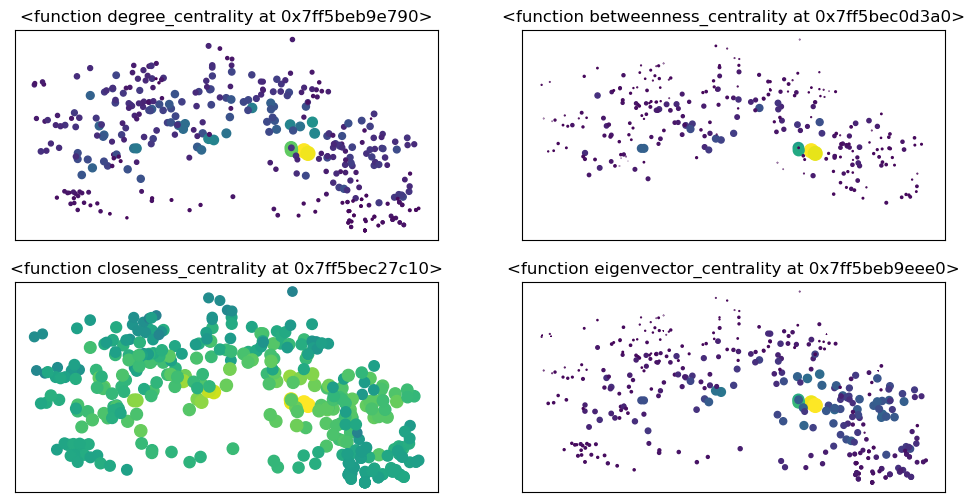

In [60]:
fig, axs = plt.subplots(2,2, figsize=(12,6))

# we will apply the four centrality measures
funcs = [nx.degree_centrality, nx.betweenness_centrality, nx.closeness_centrality, nx.eigenvector_centrality]

for centrality_function, ax in zip(funcs,fig.axes):
    
    centrality = centrality_function(G) # computing centrality    
    
    node = max(centrality , key=centrality.get) # getting most central node
    print(G.nodes[node])
    
    centrality = np.asarray(list(centrality.values())) # converting to array
    
    centrality = centrality/np.max(centrality) # normalising for comparison
    
    # plot with centrality measures
    nx.draw_networkx_nodes(G, pos = pos, node_color=centrality, node_size=centrality*100,  ax=ax)    
    ax.set_title(centrality_function)

So we can see that the interneurons called AVAR and AVAL are the most central across almost all measures. **This neuron has been implicated in motor control and when ablated significantly reduces motor function in the C. Elegan.**

In fact lets look at a few of the top nodes...

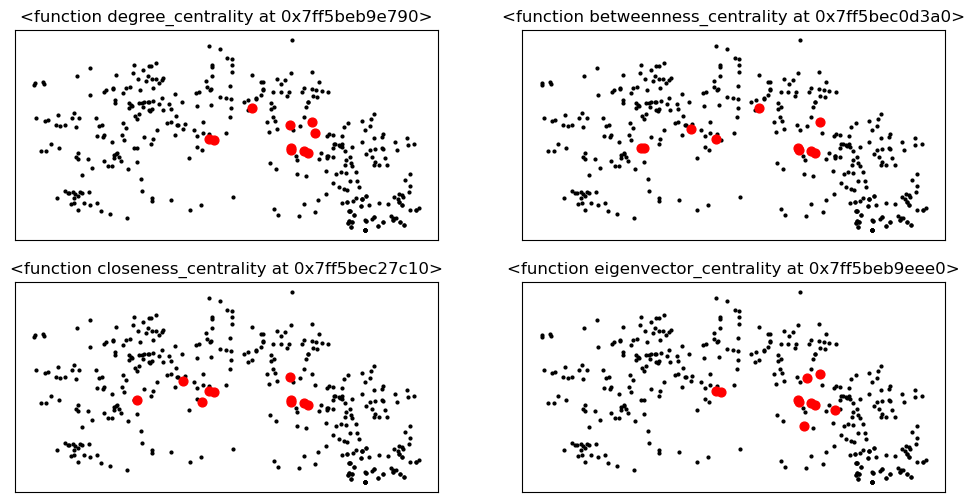

In [94]:
fig, axs = plt.subplots(2,2, figsize=(12,6))

# we will apply the four centrality measures
funcs = [nx.degree_centrality, nx.betweenness_centrality, nx.closeness_centrality, nx.eigenvector_centrality]

central_neurons = pd.DataFrame()
central_neurons_type = pd.DataFrame()

for centrality_function, ax in zip(funcs,fig.axes):
    
    centrality = centrality_function(G) # computing centrality    
    
    top_nodes = np.array(sorted(centrality , key=centrality.get))[::-1] # ordering nodes by centrality
    #print(G.nodes[node])
        
    # plot with centrality measures
    nx.draw_networkx_nodes(G, pos = pos, nodelist = top_nodes[10:], node_color='k', node_size=4,  ax=ax)    
    ax.set_title(centrality_function)

    # plot with centrality measures
    nx.draw_networkx_nodes(G, pos = pos, nodelist = top_nodes[:10], node_color='r', node_size=40,  ax=ax)    
    ax.set_title(centrality_function)
    
    # extracting top 10 nodes for each centrality function
    central_neurons[centrality_function.__name__] = [G.nodes[u]['name'] for u in top_nodes[:10]]
    central_neurons_type[centrality_function.__name__] = [G.nodes[u]['type'] for u in top_nodes[:10]]

In [98]:
central_neurons

,degree_centrality,betweenness_centrality,closeness_centrality,eigenvector_centrality
0,AVAR,AVAR,AVAL,AVAL
1,AVAL,AVAL,AVAR,AVAR
2,AVBR,AVBR,AVBR,AVBR
3,AVBL,AVBL,AVBL,AVBL
4,PVCR,RIBL,AVEL,AVEL
5,PVCL,RIBR,AVER,AVER
6,AVER,DVA,RIGL,AVDL
7,AVDR,PVCR,AVDR,PVCR
8,AVEL,RIGL,RIMR,DA02
9,DVA,AVER,RIBL,SABD


In [99]:
central_neurons_type

,degree_centrality,betweenness_centrality,closeness_centrality,eigenvector_centrality
0,I,I,I,I
1,I,I,I,I
2,I,I,I,I
3,I,I,I,I
4,I,I,I,I
5,I,I,I,I
6,I,I,I,I
7,I,I,I,I
8,I,I,M,M
9,I,I,I,I


We can see that a lot of interneurons appear as the most central nodes regardless of centrality function!

All are command interneurons involved in the locomotory circuit. The centrality of command interneurons may indicate that in the C. elegans nervous system, signals can propagate efficiently from various sources towards these neurons and away from them, and that they are in a good position to integrate it.

### Pagerank

Now lets do a deep dive into pagerank (this is very similar to eigenvector centrality but for directed networks). PageRank computes a ranking of the nodes in the graph G based on the structure of the incoming links. It was originally designed as an algorithm to rank web pages (in fact you may have heard of a little known spin-out company called Google that was founded on this algorithm). We choose this measure because its purposed for directed networks, whilst other measures such as eigenvector centrality are defined on undirected networks.
Pagerank is based on random walks. Simply put: *If a large number of random-walks on a network end up at the particular node then  it must be important.*


\begin{align*}
\begin{bmatrix}
0 & 1 & 1\\
1 & 1 & 0\\
0 & 1 & 0
\end{bmatrix}
\rightarrow
\begin{bmatrix}
0 & 0.5 & 0.5\\
0.5 & 0.5 & 0\\
0 & 1 & 0
\end{bmatrix}
\end{align*}



First we must compute the transition matrix, which is just a row-stochastic matrix (each row sums to 1) and tells us about the probability of transitioning from node $i$ to node $j$ (see above example). However, directed networks have a small problem: some nodes are sinks (no outgoing edges) and some are sources (no incoming edges). 

<img src="images/sink_in_graph.png" width="250">

<center>Directed networks can have sink nodes.</center>



Since the transition matrix represents a Markov chain, we don't want to get trapped in sinks. Therefore, for PageRank to converge to a unique solution (i.e., a unique stationary distribution in a Markov chain), the transition matrix must be irreducible. In other words, it must be that there exists a path between every pair of nodes in the graph.


We can use a damping factor (or sometimes known as teleportation constant when thought about in different terms) such that the random-walker can randomly jump to another node in the network. This can be invoked using 'alpha' in the computation of the google matrix function in networkX.


In [100]:
# extract transition matrix
transition_matrix = nx.google_matrix(G.reverse(),alpha=0.85)
transition_matrix

/tmp/ipykernel_37530/506402895.py:2: FutureWarning: google_matrix will return an np.ndarray instead of a np.matrix in
NetworkX version 3.0.
  transition_matrix = nx.google_matrix(G.reverse(),alpha=0.85)


matrix([[0.00039788, 0.06578249, 0.00039788, ..., 0.00039788, 0.00039788,
         0.00039788],
        [0.07123121, 0.00039788, 0.07123121, ..., 0.00039788, 0.00039788,
         0.00039788],
        [0.00039788, 0.07123121, 0.00039788, ..., 0.00039788, 0.00039788,
         0.00039788],
        ...,
        [0.00039788, 0.00039788, 0.00039788, ..., 0.00039788, 0.00039788,
         0.00039788],
        [0.00039788, 0.00039788, 0.00039788, ..., 0.00039788, 0.00039788,
         0.00039788],
        [0.00265252, 0.00265252, 0.00265252, ..., 0.00265252, 0.00265252,
         0.00265252]])

Page rank can be computed either iteratively or algebraically. However, with large graphs, the iterative method (power method) is faster.

#### Linear algebra approach

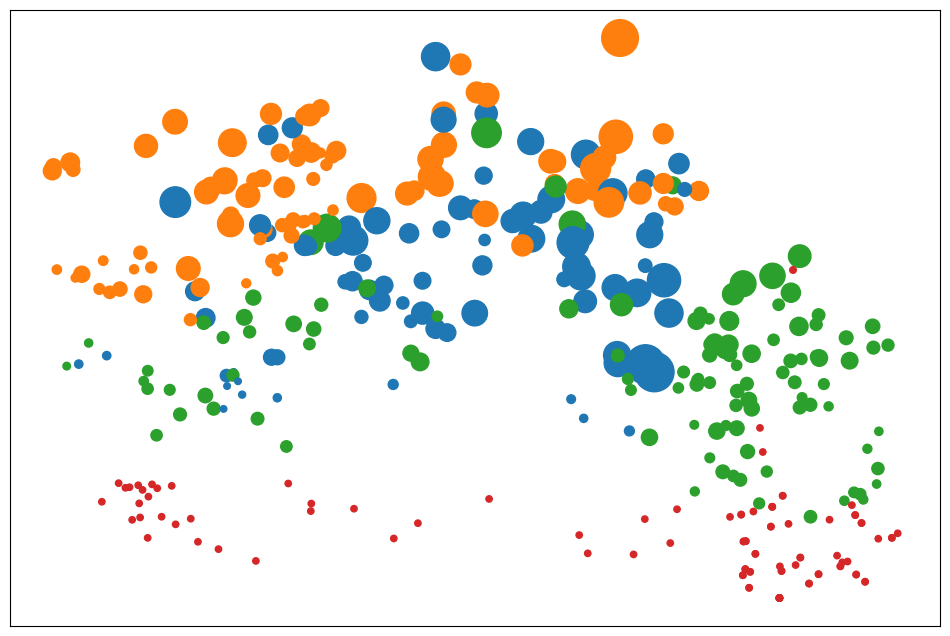

In [101]:
# compute eigendecomposition of transposed matrix
eigenvalues, eigenvectors = eigs(transition_matrix.T, k=1, which='LM')

# normalise the eigenvectors
pagerank = abs(eigenvectors)/abs(eigenvectors).sum()

# plot
plt.figure(figsize=(12, 8))
nx.draw_networkx_nodes(G, pos = pos, node_color=colours, node_size=pagerank*50000)

#### NetworkX approach

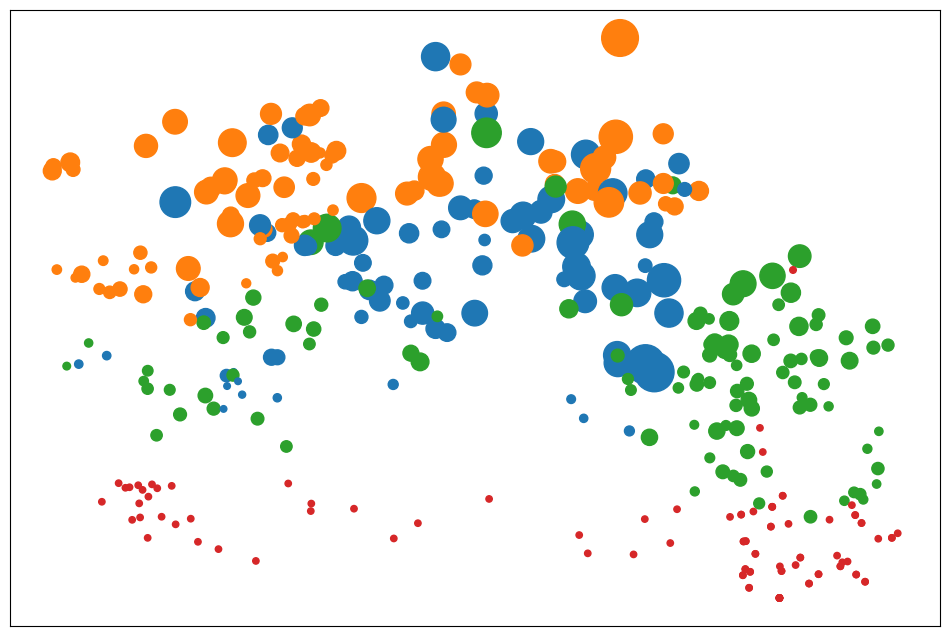

In [102]:
pagerank = nx.pagerank(G.reverse())
pagerank = np.array(list(pagerank.values()))

# plot
plt.figure(figsize=(12, 8))
nx.draw_networkx_nodes(G, pos = pos, node_color=colours, node_size=pagerank*50000)

#### Power iteration method

In [103]:
from scipy import linalg

# define vector of ones (this could be anything)
r = np.ones((A.shape[0], 1))

converged = False
numIter  = 0

# loop over until the r vector doesn't update any longer
while not converged:
    
    # apply transition matrix to r
    r_new = (transition_matrix.T).dot(r)
    
    # check for convergence
    if (linalg.norm(r-r_new) < 0.0001):
        converged = True
    else:
        # update r with the new r 
        r = r_new
    
    # count the iterations required
    numIter += 1
   

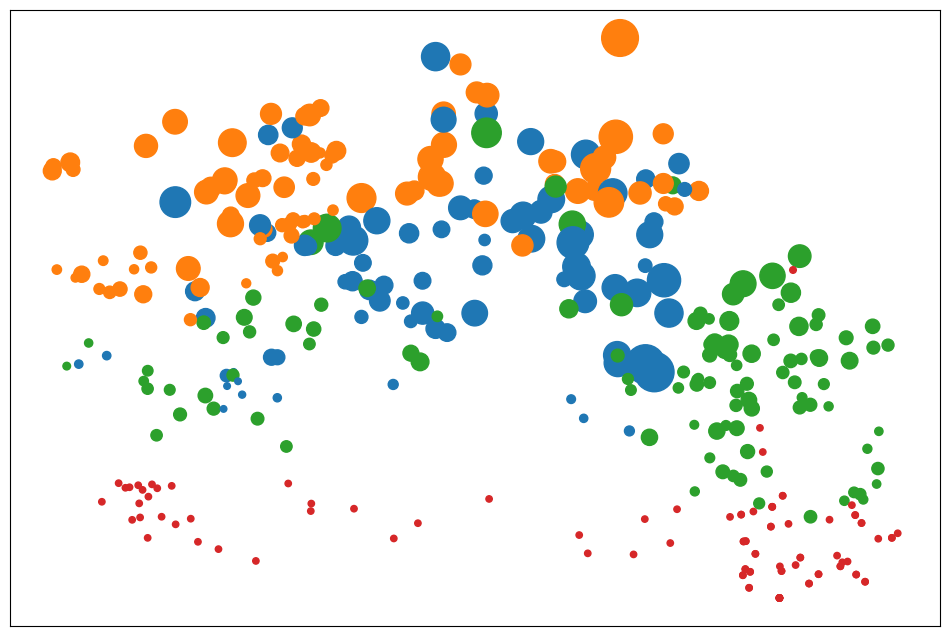

In [104]:
# normalise the centrality values
pagerank = np.array(r/r.sum())

# plot
plt.figure(figsize=(12, 8))
nx.draw_networkx_nodes(G, pos = pos, node_color=colours, node_size=pagerank*50000)

## 4. Modules/communities in C. Elegan structure

The complexity of biological, social, and engineering networks makes it desirable to find natural partitions into clusters (or communities) that can provide insight into the structure of the overall system and even act as simplified functional descriptions. A long standing technical challenge in network science is the automated discovery of communities — groups of nodes that are strongly connected or that share similar features or roles.

Community detection is a rich and challenging problem, partly because it is not very well posed: what exactly do we mean by a community? In most cases, communities are defined as non-overlapping groups of nodes such that there are more edges within groups than between them, but this definition still leaves open many possibilities, and there are correspondingly many computational approaches. Moreover, there can exist multiple hierarchies of partitions as we see in the image below.

<img src="images/multiscale_communities.png" width="400">

There are many algorithms for identifying community partitions in networks, which generally fall into three classes (although of course there is overlap between them):
1. Optimization methods, whereby the algorithm assigns scores to each possible division of the network. e.g. modularity.
2. Statistical inference, whereby communities are not merely a feature of the network structure but a primary driver of it, i.e., the network has been generated from some statistical distribution.
3. Methods that rely on links between community structure and dynamical processes taking place on networks, particularly random walks.


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or R

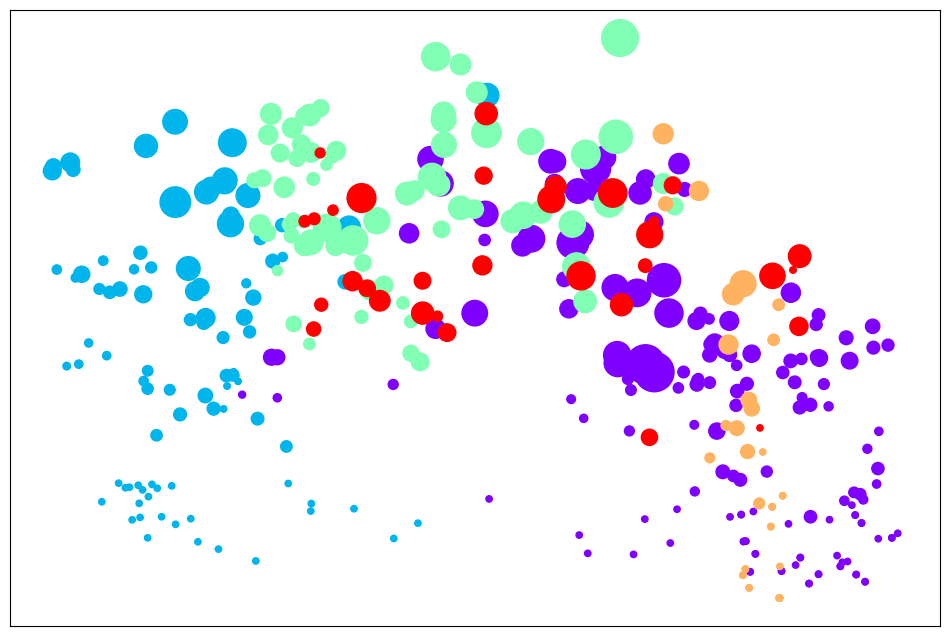

In [105]:
from networkx.algorithms.community import greedy_modularity_communities
from matplotlib.pyplot import cm

# identify optimal partition
partition = greedy_modularity_communities(G)

# define colour scheme
color = iter(cm.rainbow(np.linspace(0, 1, len(partition))))

# loop over and plot each partition in a different colour
plt.figure(figsize=(12, 8))
for community in partition:
    c = next(color)
    nx.draw_networkx_nodes(G, pos = pos, nodelist=list(community),  node_color=c, node_size=pagerank[list(community)]*50000)


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


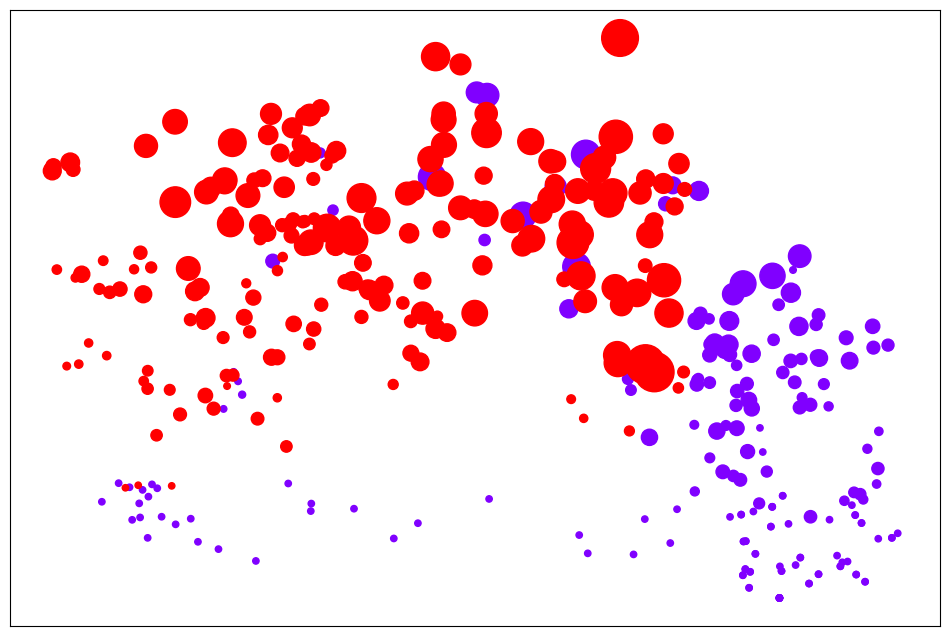

In [106]:
from networkx.algorithms.community import kernighan_lin_bisection
from matplotlib.pyplot import cm

# identify optimal partition (this algo only works on undirected networks)
partition = kernighan_lin_bisection(G.to_undirected())

# define colour scheme
color = iter(cm.rainbow(np.linspace(0, 1, sum(1 for _ in partition))))

# loop over and plot each partition in a different colour
plt.figure(figsize=(12, 8))
for community in partition:
    c = next(color)
    nx.draw_networkx_nodes(G, pos = pos, nodelist=list(community),  node_color=c, node_size=pagerank[list(community)]*50000)


